In [1]:
import pandas as pd

# prerequisites
import torch
th = torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
import numpy as np

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
to_tensor = lambda x: torch.tensor(x).to(torch.float32)

import pandas as pd

# Load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def display_image_grid(images, nrows, ncols, res):
    """
    Display images in a grid layout using gridspec.
    
    Parameters:
    - images: numpy array of shape (n, res, res)
    - nrows: number of rows in the grid
    - ncols: number of columns in the grid
    - res: resolution of each image
    """
    fig = plt.figure(figsize=(ncols * 2, nrows * 2))
    gs = gridspec.GridSpec(nrows, ncols, wspace=0.1, hspace=0.1)

    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if idx < images.shape[0]:
                ax = fig.add_subplot(gs[i, j])
                ax.imshow(images[idx], cmap='binary', origin='lower')
                ax.axis('off')
            else:
                ax = fig.add_subplot(gs[i, j])
                ax.axis('off')
    
    plt.show()

# Example usage:
# Assuming you have an array of images of shape (n, res, res)


In [3]:
fp = '../../../Datasets/weave_bitmap/9ctrlpts_full_symm.csv'

In [4]:
data_raw_0 = pd.read_csv(fp)

In [5]:
data_raw_0

,id,cp_0,cp_1,cp_2,cp_3,cp_4,cp_5,cp_6,cp_7,cp_8,...,bm_23_18,bm_23_19,bm_23_20,bm_23_21,bm_23_22,bm_23_23,obj_float,obj_int,obj_float_w,var_float
0,2024-06-02_12-57-01.jpg,20.575,7.775,20.575,7.775,0.325,7.775,20.575,7.775,20.575,...,1.0,1.0,0.0,0.0,0.0,0.0,0.078451,0.658731,0.192072,8.040908
1,2024-06-02_12-58-17.jpg,3.200,6.750,3.200,6.750,10.525,6.750,3.200,6.750,3.200,...,1.0,0.0,0.0,0.0,1.0,0.0,0.190347,0.454870,0.784248,12.313580
2,2024-06-02_12-58-22.jpg,0.150,6.525,0.150,6.525,3.275,6.525,0.150,6.525,0.150,...,0.0,1.0,1.0,0.0,1.0,0.0,0.279407,0.344641,0.999939,20.087081
3,2024-06-02_12-58-27.jpg,8.200,2.250,8.200,2.250,6.175,2.250,8.200,2.250,8.200,...,0.0,1.0,1.0,0.0,1.0,0.0,0.434853,0.333720,0.987471,20.138163
4,2024-06-02_12-58-32.jpg,3.750,0.400,3.750,0.400,8.475,0.400,3.750,0.400,3.750,...,1.0,1.0,0.0,1.0,1.0,1.0,0.232568,0.436358,0.999915,38.818866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,2024-06-02_17-23-40.jpg,18.425,19.825,18.425,19.825,22.250,19.825,18.425,19.825,18.425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.291456,0.288717,0.999010,23.423018
2998,2024-06-02_17-23-46.jpg,13.425,3.975,13.425,3.975,20.075,3.975,13.425,3.975,13.425,...,0.0,1.0,1.0,0.0,1.0,1.0,0.063023,0.577470,0.186826,6.579665
2999,2024-06-02_17-23-51.jpg,0.225,17.725,0.225,17.725,19.000,17.725,0.225,17.725,0.225,...,0.0,0.0,0.0,1.0,0.0,0.0,0.247807,0.447288,0.998903,22.100107
3000,2024-06-02_17-23-56.jpg,6.175,17.725,6.175,17.725,0.675,17.725,6.175,17.725,6.175,...,0.0,0.0,1.0,1.0,0.0,0.0,0.176939,0.522824,0.538924,11.292375


In [6]:
dim = 24
# Make column names
cols_pxs = ['bm_{}_{}'.format(int(_y), int(_x)) for _y in range(dim) for _x in range(dim)]

pxs = torch.tensor(data_raw_0[cols_pxs].values).reshape(-1, dim, dim)
data_raw = data_raw_0.drop_duplicates(subset=cols_pxs)

In [7]:
n_cps = 9
cols_cps = ['cp_{}'.format(int(_i)) for _i in range(n_cps)]
cps =  torch.tensor(data_raw[cols_cps].values).reshape(-1, len(cols_cps))

In [8]:
fps = data_raw['id'].values

In [9]:
data_raw['id']

0       2024-06-02_12-57-01.jpg
1       2024-06-02_12-58-17.jpg
2       2024-06-02_12-58-22.jpg
3       2024-06-02_12-58-27.jpg
4       2024-06-02_12-58-32.jpg
                 ...           
2993    2024-06-02_17-23-19.jpg
2994    2024-06-02_17-23-24.jpg
2995    2024-06-02_17-23-30.jpg
2997    2024-06-02_17-23-40.jpg
2998    2024-06-02_17-23-46.jpg
Name: id, Length: 2624, dtype: object

In [11]:
# Various metrics
# obj_int: interlacing %
# obj_float: float %
cols_objs = ['obj_int', 'obj_float', 'var_float', 'obj_float_w']
objs = torch.tensor(data_raw[cols_objs].values).reshape(-1, len(cols_objs))

In [12]:
# Filter out bad desings by arbitrary threshold on objectives
max_pc_interlace = 0.5
max_pc_float = 0.2

mask = np.logical_and(objs[:,0] >=0.0, objs[:,0] <= max_pc_interlace,)
mask = np.logical_and(mask,objs[:,1] <= max_pc_float).to(th.bool)
pxs_good = pxs[np.arange(objs.shape[0])[mask]]

## Quick visualisation

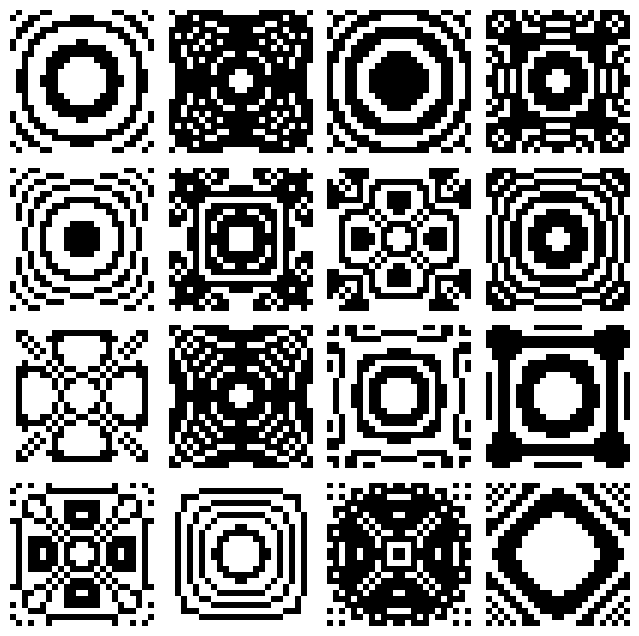

In [13]:
pxs_good.shape
nrows = ncols = 4 # Number of rows in the grid
 # Number of columns in the grid
n_to_show = nrows * ncols 

display_image_grid(pxs_good[0:n_to_show,:], nrows, ncols, dim)

# Dimensionality reduction

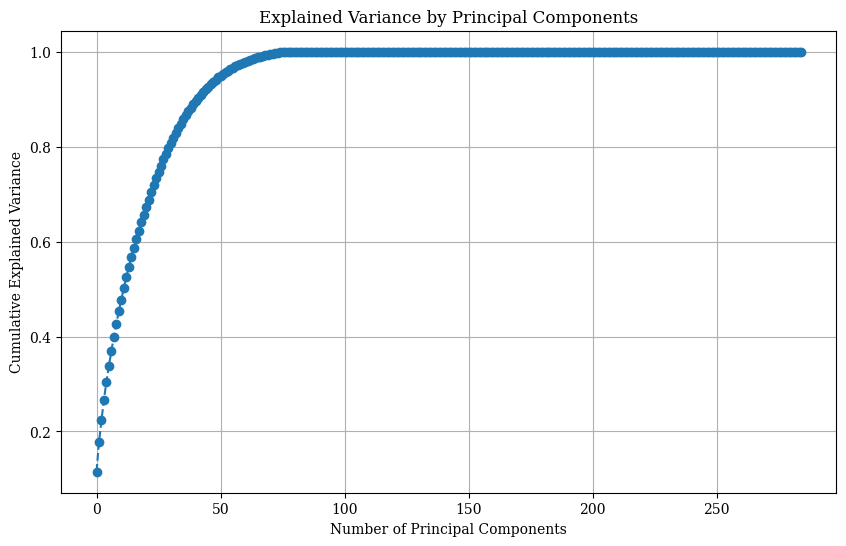

In [14]:
# Apply PCA-based dimensionality reduciton
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
scaler = StandardScaler()

data_to_pca = pxs_good
data_to_pca = data_to_pca.reshape(data_to_pca.shape[0],-1)

data_to_pca = scaler.fit_transform(data_to_pca)
principal_components = pca.fit_transform(data_to_pca.reshape(data_to_pca.shape[0],-1))
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [15]:
data_to_pca = pxs_good.reshape(pxs_good.shape[0],-1)

scaler = StandardScaler()
_data_to_pca = scaler.fit_transform(data_to_pca)

n_components = 10
pca = PCA(n_components=n_components)
data_to_pca_reduced = pca.fit_transform(_data_to_pca)

# Transform back to the original dimensions
data_to_pca_restored = pca.inverse_transform(data_to_pca_reduced)

# Unscale the data (reverse standardization)
data_to_pca_ = scaler.inverse_transform(data_to_pca_restored)

## Visualise reconstruction designs

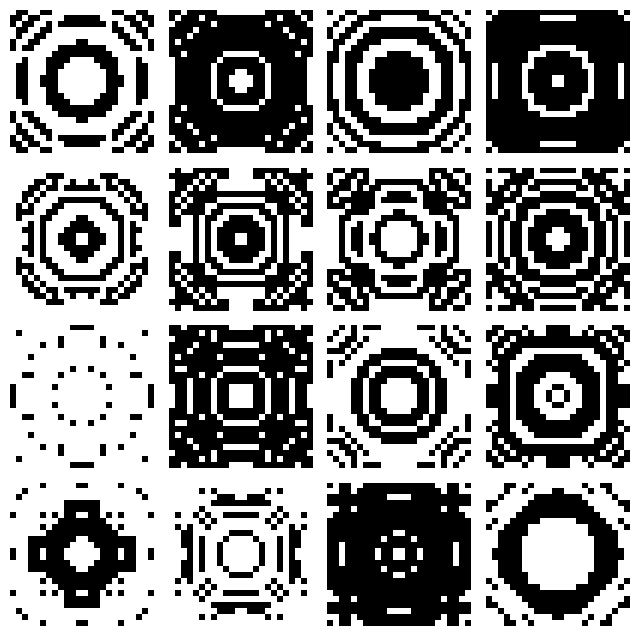

In [18]:
nrows = ncols = 4 # Number of rows in the grid
 # Number of columns in the grid
n_to_show = nrows * ncols 
mean_reduced = np.mean(data_to_pca_reduced, axis=0)
data_to_pca__ = data_to_pca_.copy()
threshold = 0.5
data_to_pca__[data_to_pca__ < threshold] = 0.
data_to_pca__[data_to_pca__ > threshold] = 1.

display_image_grid(data_to_pca__.reshape(-1,24,24)[0:n_to_show,:], nrows, ncols, dim)

# Generate new designs using sliders

In [21]:
576**0.5

24.0

In [19]:
# Genera
import ipywidgets as widgets
from IPython.display import display

scaler = StandardScaler()
_data_to_pca = scaler.fit_transform(data_to_pca)

n_components = 10
pca = PCA(n_components=n_components)
data_to_pca_reduced = pca.fit_transform(_data_to_pca)
mean_reduced = np.mean(data_to_pca_reduced, axis=0)

def generate_data(*coefficients):
    new_data_reduced = (mean_reduced + np.array(coefficients)).reshape(1,- 1)
    new_data_standardized = pca.inverse_transform(new_data_reduced)
    new_data = scaler.inverse_transform(new_data_standardized)
    return new_data

# Function to update the image based on slider values
def update_image(**kwargs):
    coefficients = [kwargs[f'pc{i}'] for i in range(n_components)]
    threshold = kwargs.get('threshold')
    new_data = generate_data(*coefficients)
    
    new_image = new_data.reshape(24, 24)
    new_image_ = new_image.copy()
    new_image_[new_image_< threshold] = 0.
    new_image_[new_image_>=threshold]=1.
    plt.figure(figsize=(5, 5))
    plt.imshow(new_image_, cmap='gray')
    plt.title('Generated Image')
    plt.axis('off')
    plt.show()

# Create sliders for the top 8 principal components
sliders = {f'pc{i}': widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description=f'PC{i+1}') for i in range(n_components)}
sliders.update({f'threshold': widgets.FloatSlider(min=0., max=1., step=0.1, value=0.5, description=f'threshold')})

# Create interactive output
ui = widgets.interactive_output(update_image, sliders)
display(ui)

# Display sliders
display(widgets.VBox([sliders[f'pc{i}'] for i in range(n_components)]))
display(widgets.VBox([sliders[f'threshold']]))

Output()